In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.DataFrame.from_records([ json.loads(l) for l in open("../sum.json") ])

In [42]:
df

,arch,count,host,language,language_ver,length,mem_size,name,os,os_ver,samples,time,timestamp
0,x86_64,10,sorrel.local,python,3.5.1,1024,8192,numpy.sum,Darwin,14.5.0,100,0.000003,2016-08-08T15:07:42Z
1,x86_64,10,sorrel.local,python,3.5.1,2048,16384,numpy.sum,Darwin,14.5.0,100,0.000004,2016-08-08T15:07:42Z
2,x86_64,10,sorrel.local,python,3.5.1,4096,32768,numpy.sum,Darwin,14.5.0,100,0.000005,2016-08-08T15:07:42Z
3,x86_64,10,sorrel.local,python,3.5.1,8192,65536,numpy.sum,Darwin,14.5.0,100,0.000006,2016-08-08T15:07:42Z
4,x86_64,1,sorrel.local,python,3.5.1,16384,131072,numpy.sum,Darwin,14.5.0,100,0.000011,2016-08-08T15:07:42Z
5,x86_64,1,sorrel.local,python,3.5.1,32768,262144,numpy.sum,Darwin,14.5.0,100,0.000020,2016-08-08T15:07:42Z
6,x86_64,1,sorrel.local,python,3.5.1,65536,524288,numpy.sum,Darwin,14.5.0,100,0.000036,2016-08-08T15:07:42Z
7,x86_64,1,sorrel.local,python,3.5.1,131072,1048576,numpy.sum,Darwin,14.5.0,100,0.000067,2016-08-08T15:07:42Z
8,x86_64,1,sorrel.local,python,3.5.1,262144,2097152,numpy.sum,Darwin,14.5.0,100,0.000132,2016-08-08T15:07:42Z
9,x86_64,1,sorrel.local,python,3.5.1,524288,4194304,numpy.sum,Darwin,14.5.0,100,0.000333,2016-08-08T15:07:43Z


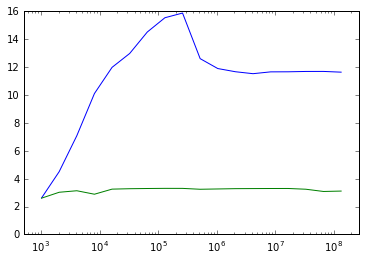

In [57]:
py = df[df["language"] == "python"]
plt.semilogx(py["length"], py["mem_size"] / py["time"] / 1E9)
js = df[df["language"] == "node.js"]
plt.semilogx(js["length"], js["mem_size"] / js["time"] / 1E9)
# plt.gcf().set_figwidth(20)

plt.gca().set_xlim(df["length"].min() / 2, df["length"].max() * 2)
plt.gca().set_ylim(0);

In [40]:
df[df["size"] == 1 << 24]

,arch,count,host,language,language_ver,name,os,os_ver,samples,size,time,timestamp,total_size
14,x86_64,1,sorrel.local,python,3.5.1,sum,Darwin,14.5.0,100,16777216,0.012276,2016-08-08T01:54:47Z,16777216
